In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
df = pd.read_csv('C:\\Users\\Mubasshira\\Downloads\\Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### **Knowledge**
- **What is PCA?**  
  PCA is an **unsupervised machine learning algorithm** that helps data enthusiasts reduce the **curse of dimensionality**. In simple terms, PCA reduces the number of dimensions (features) in the data while minimizing information loss.  

- **Goal of PCA**:  
  The main objective is to find new variables called **principal components** that capture the maximum variance in the data.  

**I first thought of encoding country column because PCA only works best with numerical data. However, as Country column is a primary Identifier, encoding might lead to false artificial patterns in variance. Thus excluding from scaling and building PCA. Keeping Country column aside.**

In [2]:
df1 = df.drop(columns=['country'])

# Standardizing columns

- Standardization is a crucial step before performing PCA because unstandardized data can introduce artificial patterns in variance, which may confuse the model.  
  - Instead of directly using libraries like `StandardScaler`, I used **pandas** and **NumPy** to manually standardize the data using the 
  Z-score formula: (observed value - mean of data)/standard deviation of data)
    

In [3]:
standard_df = (df1 - df1.mean()) / df1.std()
standard_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692
...,...,...,...,...,...,...,...,...,...
162,-0.224902,0.200315,-0.569997,0.239979,-0.736313,-0.488315,-0.849606,0.364658,-0.545273
163,-0.524935,-0.459980,-0.693776,-1.209860,-0.033442,3.606020,0.544723,-0.315728,0.029235
164,-0.371199,1.126916,0.008851,1.375892,-0.656429,0.408503,0.286097,-0.659224,-0.635842
165,0.447072,-0.405259,-0.595481,-0.515920,-0.656948,1.496416,-0.343599,1.137523,-0.635842


# Covariance Matrix

 - To analyze relationships and variance between features, a **covariance matrix** is created. The covariance matrix quantifies how much two variables change together, with values ranging from  to -∞ to +∞.  
  - Instead of relying on inbuilt functions from pandas or NumPy, I manually calculated the covariance matrix using mathematical formulas and **NumPy**.


In [4]:
centered_df = standard_df - standard_df.mean()

n_features = standard_df.shape[1]
covariance_matrix = np.zeros((n_features, n_features))

for i in range(n_features):
    for j in range(n_features):
        covariance_matrix[i,j] = np.sum(centered_df.iloc[:, i] * centered_df.iloc[:, j])/ len(standard_df)
        
print(covariance_matrix)

[[ 0.99401198 -0.31618847 -0.19920205 -0.12644918 -0.52117541  0.28654996
  -0.88136666  0.8433974  -0.48013976]
 [-0.31618847  0.99401198 -0.11372332  0.73296538  0.51368909 -0.10665191
   0.31441852 -0.31809432  0.41621742]
 [-0.19920205 -0.11372332  0.99401198  0.09514352  0.12880269 -0.2538466
   0.20943049 -0.1954963   0.34389388]
 [-0.12644918  0.73296538  0.09514352  0.99401198  0.12167328 -0.24551527
   0.05406484 -0.15809605  0.11480656]
 [-0.52117541  0.51368909  0.12880269  0.12167328  0.99401198 -0.14687123
   0.60829802 -0.49883502  0.89020873]
 [ 0.28654996 -0.10665191 -0.2538466  -0.24551527 -0.14687123  0.99401198
  -0.2382696   0.31502334 -0.22030393]
 [-0.88136666  0.31441852  0.20943049  0.05406484  0.60829802 -0.2382696
   0.99401198 -0.75631855  0.59649579]
 [ 0.8433974  -0.31809432 -0.1954963  -0.15809605 -0.49883502  0.31502334
  -0.75631855  0.99401198 -0.45218625]
 [-0.48013976  0.41621742  0.34389388  0.11480656  0.89020873 -0.22030393
   0.59649579 -0.4521862

**lets check if our manual implementation is correct or not with the help of pandas .cov()**

**Since numpy and pandas takes sample variance i.e. n-1, we will also use n-1 in denominator in our manual formula**

In [5]:
centered_df = standard_df - standard_df.mean()

n_features = len(standard_df.columns)
covariance_matrix = np.zeros((n_features, n_features))

for i in range(n_features):
    for j in range(n_features):
        covariance_matrix[i,j] = np.sum(centered_df.iloc[:, i] * centered_df.iloc[:, j])/ (len(standard_df) - 1) #N-1
        
print(covariance_matrix)

[[ 1.         -0.31809322 -0.20040206 -0.12721092 -0.52431502  0.28827617
  -0.8866761   0.84847811 -0.48303217]
 [-0.31809322  1.         -0.1144084   0.73738083  0.5167836  -0.10729439
   0.3163126  -0.32001055  0.41872475]
 [-0.20040206 -0.1144084   1.          0.09571668  0.12957861 -0.25537579
   0.21069212 -0.19667399  0.34596553]
 [-0.12721092  0.73738083  0.09571668  1.          0.12240625 -0.24699428
   0.05439053 -0.15904843  0.11549817]
 [-0.52431502  0.5167836   0.12957861  0.12240625  1.         -0.147756
   0.61196247 -0.50184005  0.89557143]
 [ 0.28827617 -0.10729439 -0.25537579 -0.24699428 -0.147756    1.
  -0.23970496  0.31692107 -0.22163106]
 [-0.8866761   0.3163126   0.21069212  0.05439053  0.61196247 -0.23970496
   1.         -0.76087469  0.60008913]
 [ 0.84847811 -0.32001055 -0.19667399 -0.15904843 -0.50184005  0.31692107
  -0.76087469  1.         -0.45491027]
 [-0.48303217  0.41872475  0.34596553  0.11549817  0.89557143 -0.22163106
   0.60008913 -0.45491027  1.   

In [6]:
pandas_cov = standard_df.cov().to_numpy()
pandas_cov

array([[ 1.        , -0.31809322, -0.20040206, -0.12721092, -0.52431502,
         0.28827617, -0.8866761 ,  0.84847811, -0.48303217],
       [-0.31809322,  1.        , -0.1144084 ,  0.73738083,  0.5167836 ,
        -0.10729439,  0.3163126 , -0.32001055,  0.41872475],
       [-0.20040206, -0.1144084 ,  1.        ,  0.09571668,  0.12957861,
        -0.25537579,  0.21069212, -0.19667399,  0.34596553],
       [-0.12721092,  0.73738083,  0.09571668,  1.        ,  0.12240625,
        -0.24699428,  0.05439053, -0.15904843,  0.11549817],
       [-0.52431502,  0.5167836 ,  0.12957861,  0.12240625,  1.        ,
        -0.147756  ,  0.61196247, -0.50184005,  0.89557143],
       [ 0.28827617, -0.10729439, -0.25537579, -0.24699428, -0.147756  ,
         1.        , -0.23970496,  0.31692107, -0.22163106],
       [-0.8866761 ,  0.3163126 ,  0.21069212,  0.05439053,  0.61196247,
        -0.23970496,  1.        , -0.76087469,  0.60008913],
       [ 0.84847811, -0.32001055, -0.19667399, -0.15904843, -0

- Yay! got exact similar values.

In [7]:
standard_df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<Axes: >

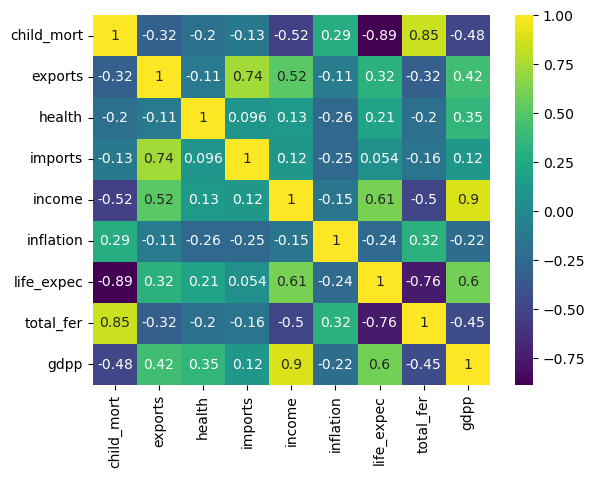

In [8]:
import seaborn as sns
sns.heatmap(covariance_matrix, annot=True, xticklabels=standard_df.columns, yticklabels=standard_df.columns, cmap='viridis')

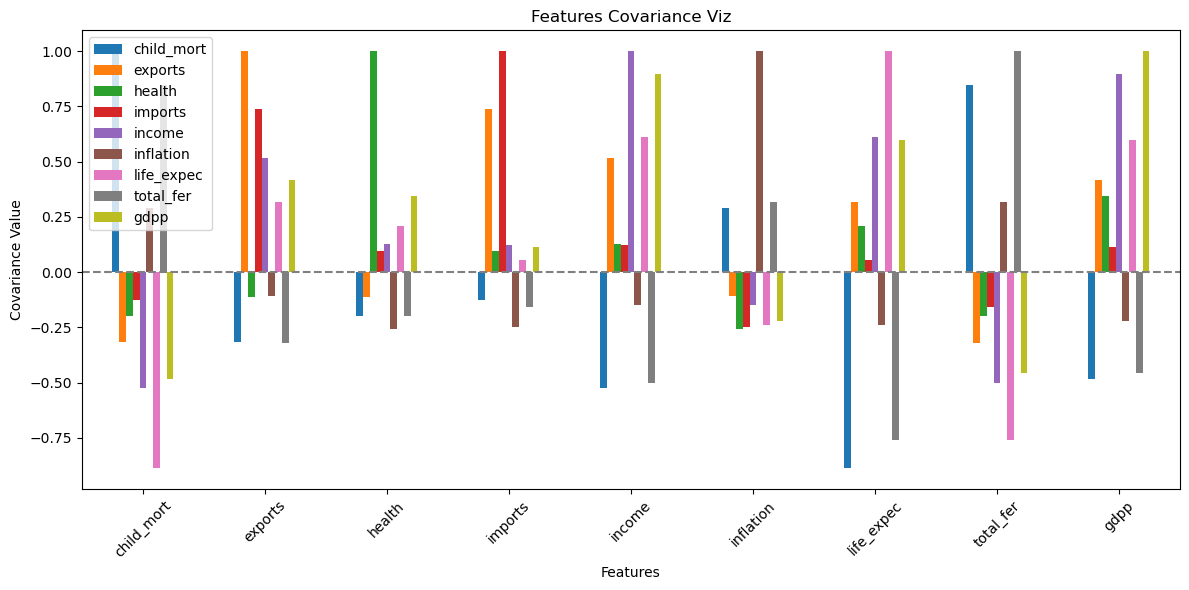

In [9]:
import matplotlib.pyplot as plt
std_cov = standard_df.cov()
features_viz = pd.DataFrame(std_cov, index=std_cov.columns)

features_viz.plot(kind='bar', figsize=(12, 6))
plt.title('Features Covariance Viz')
plt.xlabel('Features')
plt.ylabel('Covariance Value')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# def char_equation(matrix):
#     size = len(covariance_matrix)
#     identity = np.identity(size)
    
#     determinant_coef = []
    
#     for lambda_val in range(size + 1):
#         terms = matrix - lambda_val * identity 
#         determinant_coef.append(np.linalg.det(terms))
        
#     return determinant_coef

In [11]:
# values = char_equation(covariance_matrix)
# values

# Computing EigenValues and EigenVectors

  - Next, I calculated **eigenvectors** (unit vectors that point in the direction of maximum variance) and **eigenvalues** (which represent the magnitude of variance).  
  - For this, I utilized NumPy's linear algebra functions and sorted the eigenvalues in descending order to ensure that the most significant components appeared first.


In [12]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("Eigenvalues : ", eigenvalues)
print("Eigenvectors : ", eigenvectors)

Eigenvalues :  [4.13565658 1.54634631 1.1703833  0.99478456 0.66061903 0.22358112
 0.06687501 0.08831536 0.11343874]
Eigenvectors :  [[ 0.41951945 -0.19288394  0.02954353 -0.37065326 -0.16896968 -0.20062815
  -0.3275418  -0.68274306 -0.07948854]
 [-0.28389698 -0.61316349 -0.14476069 -0.00309102  0.05761584  0.05933283
   0.12308207 -0.01419742 -0.70730269]
 [-0.15083782  0.24308678  0.59663237 -0.4618975   0.51800037 -0.00727646
  -0.11308797  0.07249683 -0.24983051]
 [-0.16148244 -0.67182064  0.29992674  0.07190746  0.25537642  0.03003154
  -0.09903717 -0.02894642  0.59218953]
 [-0.39844111 -0.02253553 -0.3015475  -0.39215904 -0.2471496  -0.16034699
  -0.61298247  0.35262369  0.09556237]
 [ 0.19317293  0.00840447 -0.64251951 -0.15044176  0.7148691  -0.06628537
   0.02523614 -0.01153775  0.10463252]
 [-0.42583938  0.22270674 -0.11391854  0.20379723  0.1082198   0.60112652
  -0.29403981 -0.50466425  0.01848639]
 [ 0.40372896 -0.15523311 -0.01954925 -0.37830365 -0.13526221  0.75068875
  

In [13]:
sorted_idices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idices]
eigenvectors = eigenvectors[:, sorted_idices]
print("Eigenvalues : ", eigenvalues)
print("Eigenvectors : ", eigenvectors)

Eigenvalues :  [4.13565658 1.54634631 1.1703833  0.99478456 0.66061903 0.22358112
 0.11343874 0.08831536 0.06687501]
Eigenvectors :  [[ 0.41951945 -0.19288394  0.02954353 -0.37065326 -0.16896968 -0.20062815
  -0.07948854 -0.68274306 -0.3275418 ]
 [-0.28389698 -0.61316349 -0.14476069 -0.00309102  0.05761584  0.05933283
  -0.70730269 -0.01419742  0.12308207]
 [-0.15083782  0.24308678  0.59663237 -0.4618975   0.51800037 -0.00727646
  -0.24983051  0.07249683 -0.11308797]
 [-0.16148244 -0.67182064  0.29992674  0.07190746  0.25537642  0.03003154
   0.59218953 -0.02894642 -0.09903717]
 [-0.39844111 -0.02253553 -0.3015475  -0.39215904 -0.2471496  -0.16034699
   0.09556237  0.35262369 -0.61298247]
 [ 0.19317293  0.00840447 -0.64251951 -0.15044176  0.7148691  -0.06628537
   0.10463252 -0.01153775  0.02523614]
 [-0.42583938  0.22270674 -0.11391854  0.20379723  0.1082198   0.60112652
   0.01848639 -0.50466425 -0.29403981]
 [ 0.40372896 -0.15523311 -0.01954925 -0.37830365 -0.13526221  0.75068875
  

# Cumulative Variance

In [14]:
#Total variance is the sum of the eigenvalues of a covariance matrix
total_variance = sum(eigenvalues)

#Explained variance ratio refers to measure of proportion of total variance in dataset explained by each component
explained_variance_ratio = [(i / total_variance) for i in eigenvalues]

#Cumulative variance measures how much of a dataset's variance is represented by a certain number of principal components
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Total Variance: ", total_variance)
print("Explained Variance Ratio: ", explained_variance_ratio)
print("Cumulative Variance: ", cumulative_variance)

Total Variance:  9.000000000000002
Explained Variance Ratio:  [0.45951739786095874, 0.17181625651618218, 0.13004258896953083, 0.11053161805571925, 0.07340211424156037, 0.024842346764277375, 0.012604303981650281, 0.009812817379261556, 0.007430556230859523]
Cumulative Variance:  [0.4595174  0.63133365 0.76137624 0.87190786 0.94530998 0.97015232
 0.98275663 0.99256944 1.        ]


# Number of Components

In [15]:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
n_components

6

- I set a threshold of **95% cumulative variance** and determined that **6 components** out of the original 9 features were sufficient to retain 95% of the information in the dataset.  

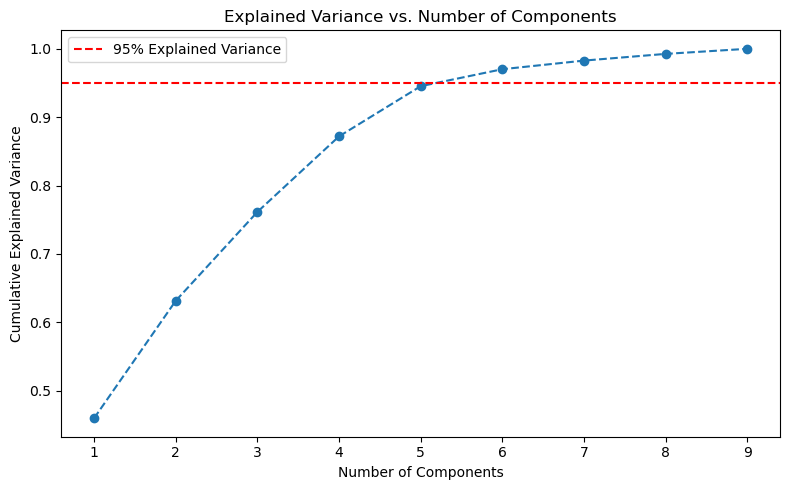

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.legend()
plt.tight_layout()
plt.show()

**The components up to the 6th (with cumulative variance of 97.02%) are selected to explain at least 95% of the total variance, which is why n_components is 6.**

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components)
reduced_data = pca.fit_transform(standard_df)
reduced_data

array([[-2.90428986,  0.09533386, -0.71596521,  1.00224038, -0.15783535,
        -0.25383403],
       [ 0.42862224, -0.58639208, -0.33248555, -1.15757715,  0.17415355,
         0.08432502],
       [-0.28436983, -0.45380957,  1.21784212, -0.86551146,  0.15600546,
        -0.40049102],
       ...,
       [ 0.49702956,  1.38657416, -0.23781089, -1.07087722,  1.17255418,
         0.05145203],
       [-1.88179152, -0.10912482,  1.10642399,  0.05608809,  0.61651115,
        -0.53929524],
       [-2.855476  ,  0.48454072,  0.22249741,  0.81391648, -0.27324593,
         0.20077433]])

In [18]:
df_with_country = standard_df.copy()

# Clustering after PCA

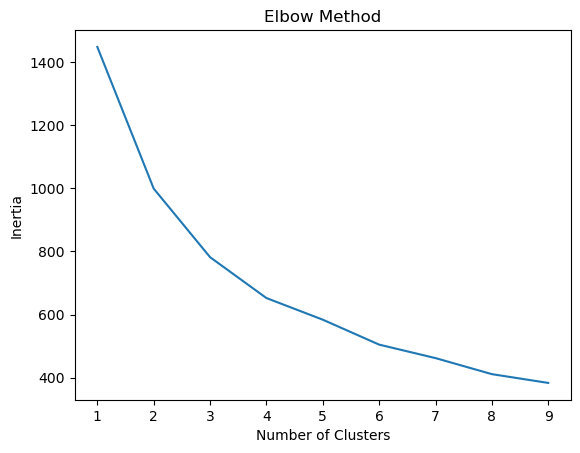

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)  
df_with_country['Cluster'] = kmeans.fit_predict(reduced_data)

inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 10), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

 - Using the **6 principal components**, I applied the **K-means clustering algorithm**. The **Elbow Method** was used to determine the optimal number of clusters, which turned out to be **4**.  


In [20]:
df_with_country['country'] = df['country']

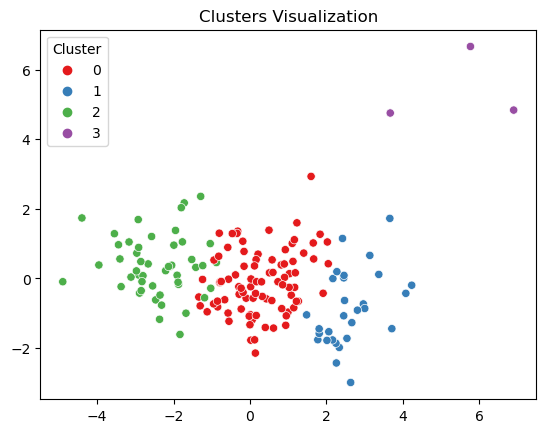

In [21]:
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df_with_country['Cluster'], palette='Set1')
plt.title('Clusters Visualization')
plt.show()

### Why choose 3 PCA for Visualizaton ?

1. **Cumulative Variance for PCA1 and PCA2**:
   - PCA1: **45.95%**
   - PCA2: **17.18%**
   - Together, PCA1 and PCA2 explain **63.13%** of the total variance.

2. **Common Guidelines**:
   - For dimensionality reduction or visualization, it’s generally desirable to retain at least **70%-80%** of the variance.
   - With PCA1 and PCA2 explaining only **63.13%**, some significant information (about 37%) is lost if we stop at 2 components.

3. **Adding PCA3**:
   - With PCA3 included, the cumulative variance increases to **76.14%**, which captures more information and may provide better insights.

---

# 3D Visualization

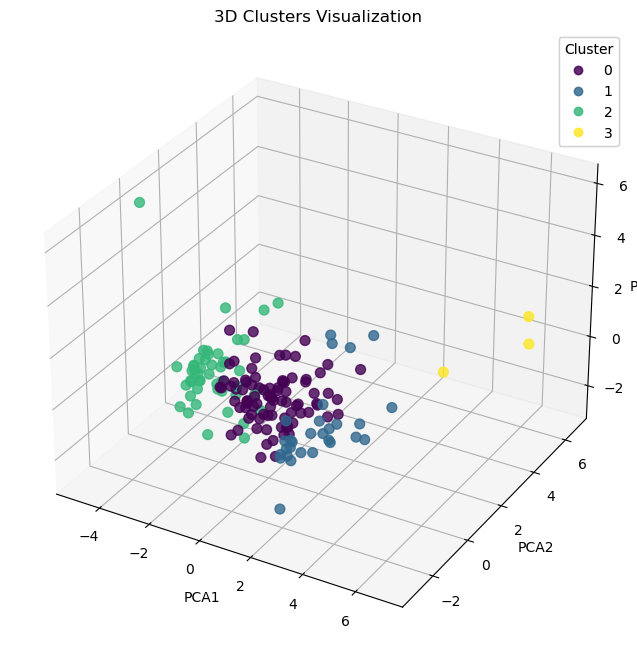

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for PCA1, PCA2, PCA3
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], 
                     c=df_with_country['Cluster'], cmap='viridis', s=50, alpha=0.8)

    
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D Clusters Visualization")

legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)

plt.show()

### Corrected Interpretation of Clusters:
1. **Cluster 0 (Purple)**:
   - Points are densely packed and close to the origin.
   - Likely represents **developing regions**, as the small spread in principal components might indicate limited variability in factors contributing to development.

2. **Cluster 1 (Green)**:
   - A few points scattered far from the origin, implying high variability.
   - Likely represents **underdeveloped regions**, as such regions often show greater outliers due to higher variability in socio-economic factors.

3. **Cluster 2 (Blue)**:
   - Moderately spread but still distinct.
   - Likely represents **developed regions** with balanced variability and indicators.

4. **Cluster 3 (Yellow)**:
   - Widely spread, indicating diversity in its principal components.
   - Likely represents **highly developed regions**, as there is variability, but not as compact as a highly developed region.

---

### Mapping Clusters to Development Stages:
- **Underdeveloped**: Cluster 1 (Green)  
- **Developing**: Cluster 0 (Purple)  
- **Developed**: Cluster 2 (Blue)  
- **Highly Developed**: Cluster 3 (Yellow)  

---

In [23]:
cluster_mapping = {0: "Developing", 1: "Underdeveloped", 2: "Developed", 3: "Highly Developed"}

# Apply the mapping to your cluster labels
df_with_country['Cluster Name'] = df_with_country['Cluster'].map(cluster_mapping)

In [24]:
df_with_country['Cluster Name'].value_counts()

Cluster Name
Developing          87
Developed           48
Underdeveloped      29
Highly Developed     3
Name: count, dtype: int64

# Project Insights

- **Dataset Aim**:  
  The main objective of the dataset was to identify countries where the CEO should focus efforts and prioritize development initiatives.  


In [25]:
temp = df_with_country[['Cluster', 'country', 'Cluster Name']]

In [26]:
result_df = pd.merge(df, temp, how='inner', left_on=['country'], right_on=['country'])
result_df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,Cluster Name
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,Developed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Developing


# Findings

- Based on clustering results, I identified **117 countries** as either **underdeveloped** or **developing**, requiring immediate attention and investment.  
  - A final **result DataFrame** was created to highlight these countries, making it easier for the CEO to focus on areas requiring the highest priority.  


In [27]:
result_data = result_df[(result_df['Cluster Name'].isin(['Underdeveloped','Developing']))]
result_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,Cluster Name
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Developing
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0,Developing
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0,Developing
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0,Developing
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,Developing
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,Developing
